In [20]:
import pandas as pd
import pygmt

A point is defined as a set of latitude, longitude, and depth, which
is located in the corner between the tail of the vector pointing in
the strike direction and the dip direction (nearest to the surface).
The shape is defined by length, width, dx, and dy. The length is the
measurement of the quadrilateral in the direction of strike, and
width is the measurement of quadrilateral in the direction of dip.
Dx is the measurement on the plane in the strike direction between
the known point and the corner between the tail of the vector pointing
in the strike direction and the dip direction (nearest to the surface).
Dy is the measurement on the plane in the dip direction between
the known point and the corner between the tail of the vector pointing
in the strike direction and the dip direction (nearest to the surface).
The orientation is defined by azimuth and angle from
horizontal, strike and dip respectively. For example in plane view:
```
                    strike direction
                p1*------------------->>p2
                *        | dy           |
         dip    |--------o              |
      direction |   dx    known point   | Width
                |                       |
                V                       |
                p4----------------------p3
                        Length
```

In the example below, each row represents a single rupture plane defined by 5 points, each with lat/lon/depth, (p1, p2, p3, p4, p1)

In [21]:
# with open('/Users/hyin/shakemap_profiles/default/data/us6000jllz/rupts.json', 'r') as file:
#     data = json.load(file)

data = pd.read_json('/Users/hyin/shakemap_profiles/default/data/us6000jllz/rupts.json')
df = pd.json_normalize(data[0])
df['lons'][5]


[38.0683699032,
 36.9988411563,
 36.9871846296,
 38.0567022206,
 38.0683699032,
 None]

## Iterate over each rupture
One row per rupture

In [ ]:

for index, row in df.iterrows():
    p1 = row['lons'][0]
    p2 = row['lons'][1]
    p3 = row['lons'][2]
    p4 = row['lons'][3]


## Create PyGMT fig of fault traces

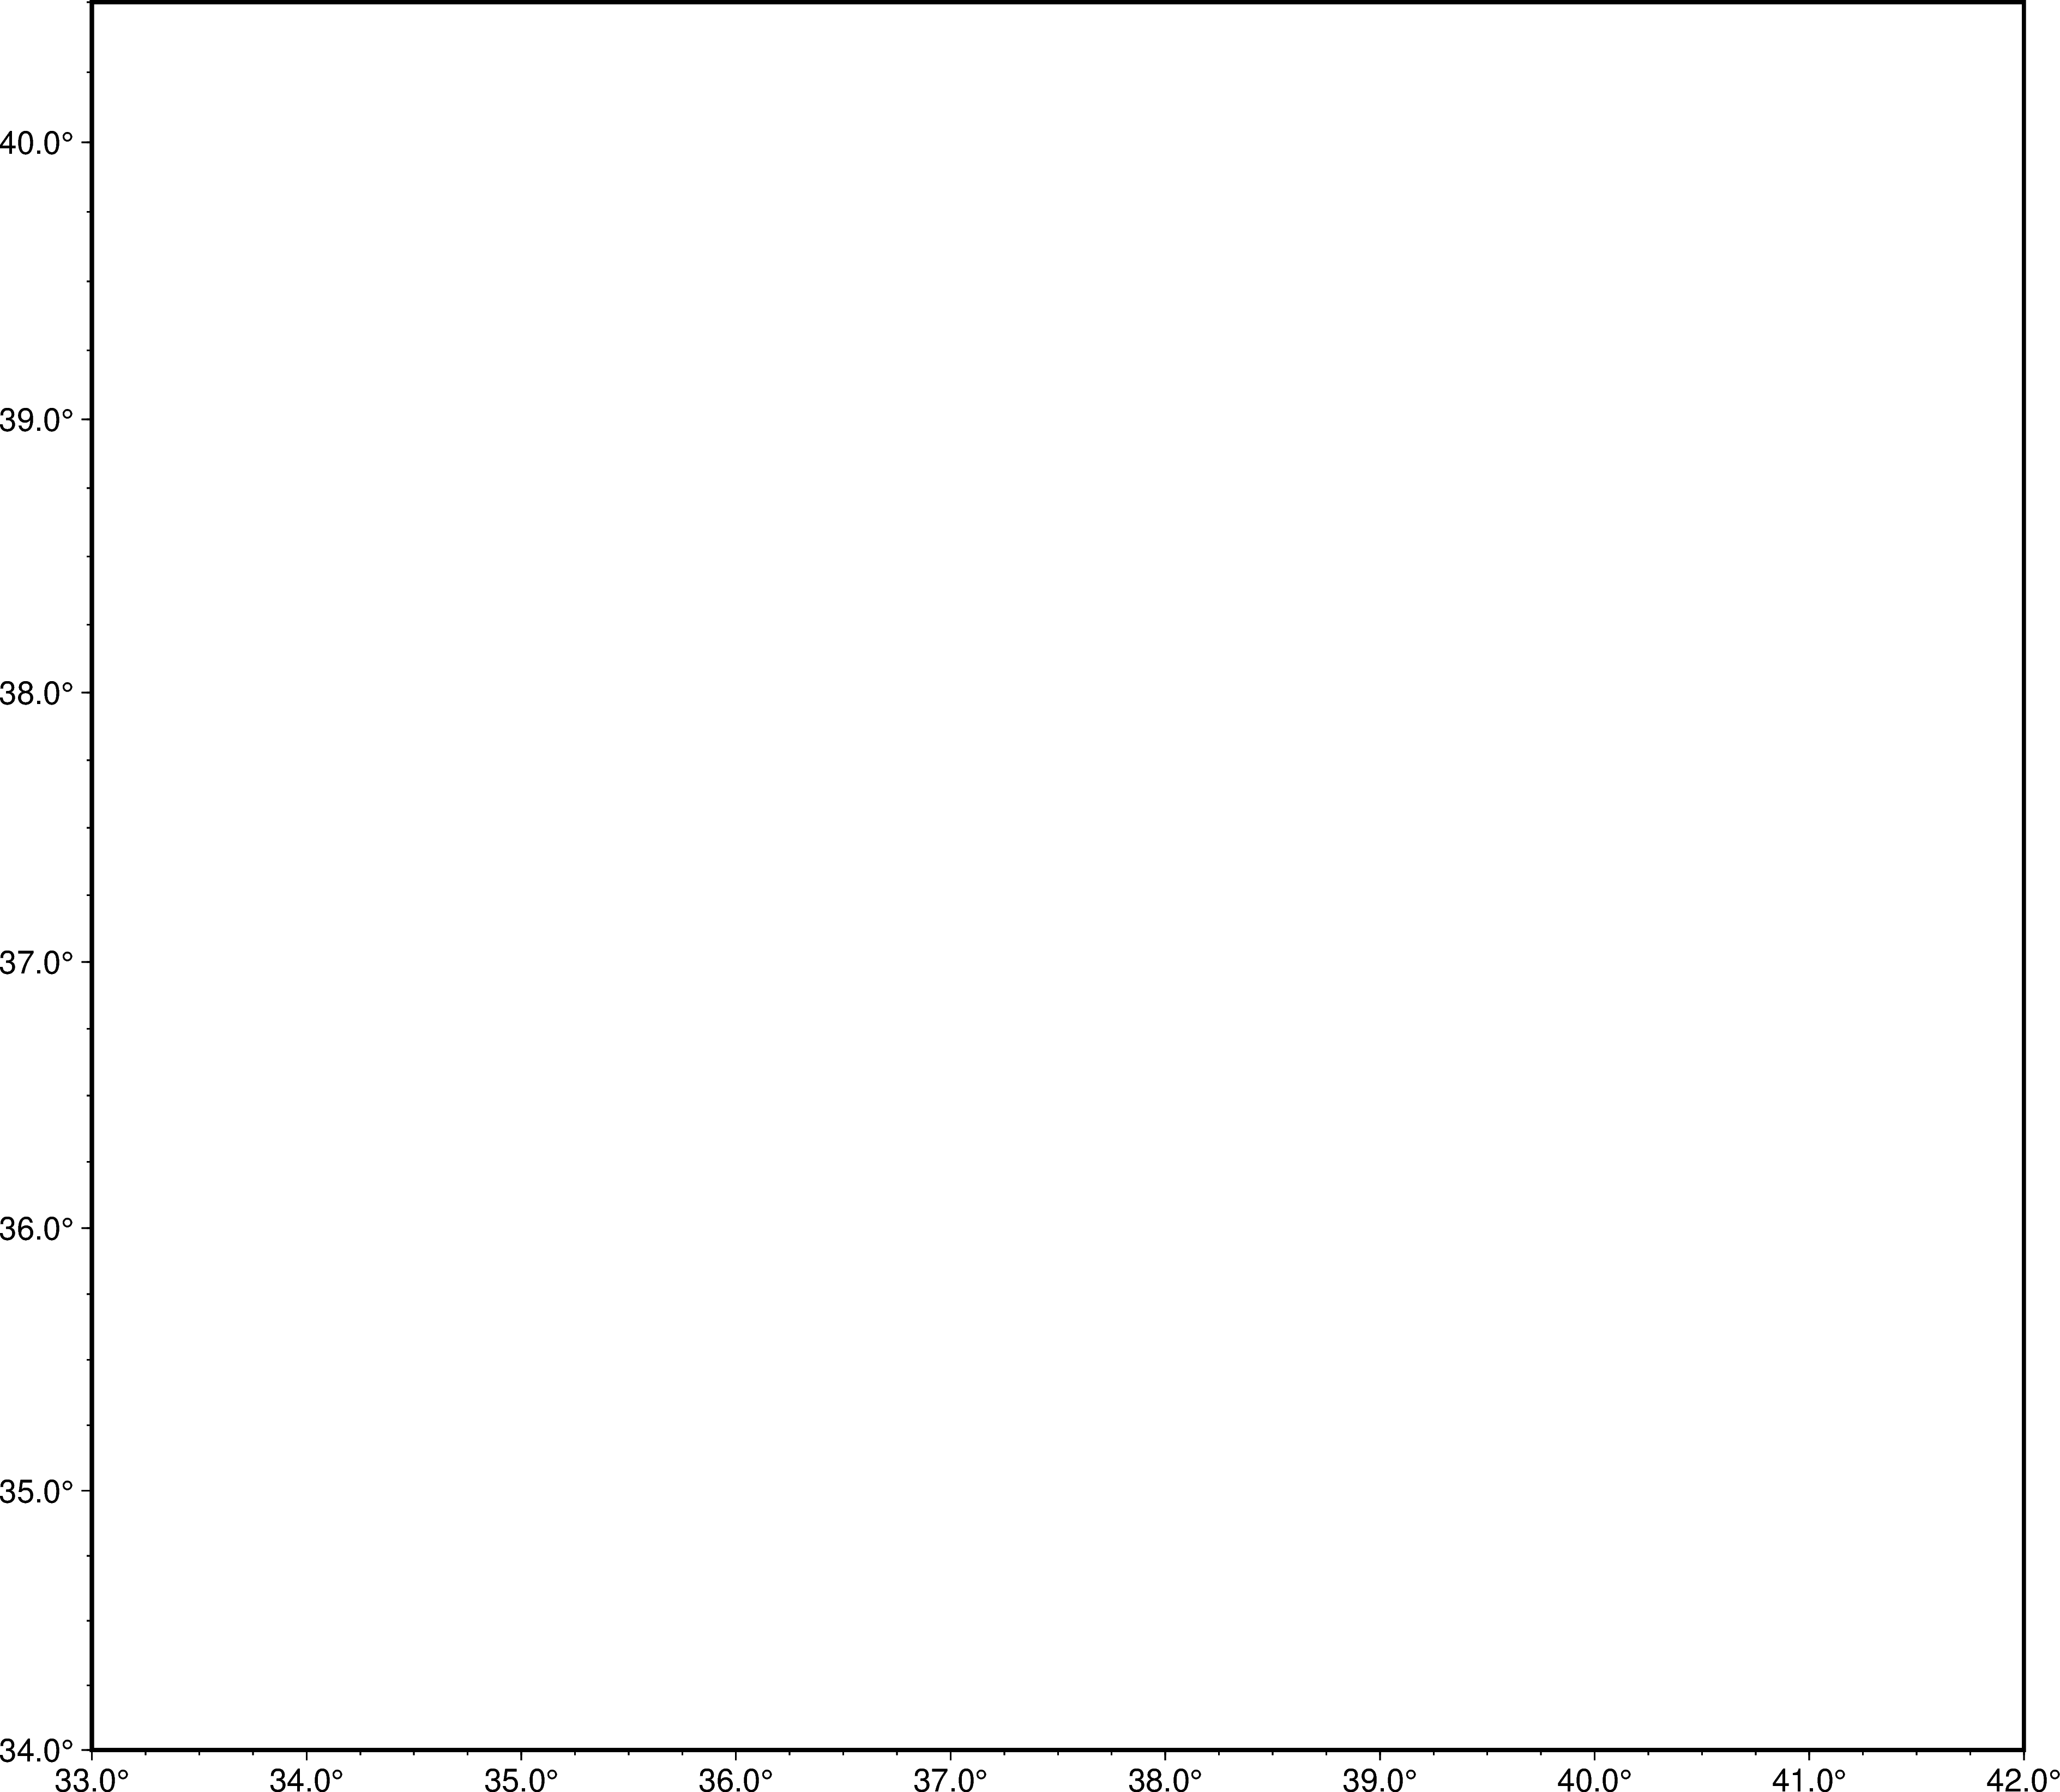

In [ ]:
plotpath = '/Users/hyin/usgs_mendenhall/shakemap/scripts/extract_rutpures/outputs/'

# Initialize figure
fig = pygmt.Figure()
# Set PyGMT universal configurations
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT="14p")
projection = 'M0/0/30c'

# rgn = [lon_min, lon_max, lat_min, lat_max]
rgn = [33,42,34,40.5]
fig.basemap(region=rgn, projection=projection, frame=True)

fig.savefig(plotpath + 'test.png')
fig.show()
